# Neural Networks (LTAT.02.001) project

Topic: Predict if the bus is leaving the bus stop

Team members: Märt Häkkinen, Anne Ott, Linnet Puskar, Liis Simmul

In [1]:
import os
import cv2
import numpy as np
import PIL
from keras.preprocessing.image import img_to_array, array_to_img
from matplotlib import pyplot as plt

from PIL import Image
from load_dataset import load_dataset

Using TensorFlow backend.


Working with 657 sets of images
Working with 63394 images
Image examples: 


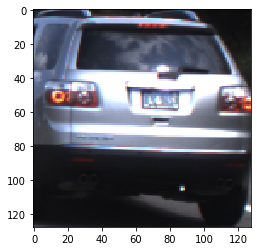

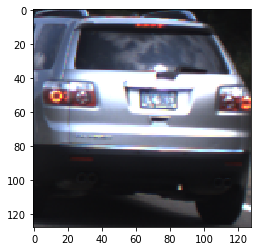

In [2]:
from load_dataset import load_dataset

sequence_limit = 15
X_train, Y_train, X_train_flow_paths, X_train_warped_paths, X_train_diff_paths, X_test, Y_test, X_test_flow_paths, X_test_warped_paths, X_test_diff_paths, image_count = load_dataset(sequence_limit = sequence_limit + 1)

print("Working with {0} sets of images".format(len(X_train) + len(X_test)))
print("Working with {0} images".format(image_count))
print("Image examples: ")

for i in range(0, 2):
    image = X_train[0][i]
    plt.imshow(image)
    plt.show()

In [ ]:
import os.path
from os import path
from matplotlib import pyplot as plt
from image_alignment import align_images
from skimage.measure import compare_ssim
import argparse
import imutils
from skimage.metrics import structural_similarity
import argparse
import imutils
# Author: Deepak Pathak (c) 2016
# from __future__ import unicode_literals
import numpy as np
from PIL import Image
import time
import argparse
from pyflow.pyflow import coarse2fine_flow

# Flow Options:
alpha = 0.012
ratio = 0.75
minWidth = 20
nOuterFPIterations = 7
nInnerFPIterations = 1
nSORIterations = 30
colType = 0  # 0 or default:RGB, 1:GRAY (but pass gray image with shape (h,w,1))

X_train_flows = []
X_train_warped = []
for i in range(len(X_train)):
    imReg = None
    print("The label is: " +  Y_train[i] + " and i is: ", i)
    X_train_flows_sub = []
    X_train_warped_sub = []
    for j in range(0, len(X_train_flow_paths[i]) - 1):
        if(path.exists(X_train_flow_paths[i][j]) and path.exists(X_train_warped_paths[i][j])):
            X_train_flows_sub.append(cv2.cvtColor(cv2.imread(X_train_flow_paths[i][j]), cv2.COLOR_BGR2RGB))
            X_train_warped_sub.append(cv2.cvtColor(cv2.imread(X_train_warped_paths[i][j]), cv2.COLOR_BGR2RGB))
        else:
            img1 = X_train[i][j]
            img2 = X_train[i][j+1]
            img1 = img1.astype(float) / 255.
            img2 = img2.astype(float) / 255.

            s = time.time()
            u, v, img2W = coarse2fine_flow(
                img1, img2, alpha, ratio, minWidth, nOuterFPIterations, nInnerFPIterations,
                nSORIterations, colType)
            e = time.time()
            print('Time Taken: %.2f seconds for image of size (%d, %d, %d)' % (
                e - s, img1.shape[0], img1.shape[1], img1.shape[2]))
            flow = np.concatenate((u[..., None], v[..., None]), axis=2)

            import cv2
            hsv = np.zeros(img1.shape, dtype=np.uint8)
            hsv[:, :, 0] = 255
            hsv[:, :, 1] = 255
            mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])
            hsv[..., 0] = ang * 180 / np.pi / 2
            hsv[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
            rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
            cv2.imwrite(X_train_flow_paths[i][j], rgb)
            cv2.imwrite(X_train_warped_paths[i][j], img2W[:, :, ::-1] * 255)
            X_train_flows_sub.append(cv2.cvtColor(cv2.imread(X_train_flow_paths[i][j]), cv2.COLOR_BGR2RGB))
            X_train_warped_sub.append(cv2.cvtColor(cv2.imread(X_train_warped_paths[i][j]), cv2.COLOR_BGR2RGB))
        X_train_flows.append(X_train_flows_sub)
        X_train_warped.append(X_train_warped_sub)

X_test_flows = []
X_test_warped = []
for i in range(len(X_test)):
    imReg = None
    print("The label is: " +  Y_test[i] + " and i is: ", i)
    X_test_flows_sub = []
    X_test_warped_sub = []
    for j in range(0, len(X_test_flow_paths[i]) - 1):
        if(path.exists(X_test_flow_paths[i][j]) and path.exists(X_test_warped_paths[i][j])):
            X_test_flows_sub.append(cv2.cvtColor(cv2.imread(X_test_flow_paths[i][j]), cv2.COLOR_BGR2RGB))
            X_test_warped_sub.append(cv2.cvtColor(cv2.imread(X_test_warped_paths[i][j]), cv2.COLOR_BGR2RGB))
        else:
            img1 = X_test[i][j]
            img2 = X_test[i][j+1]
            img1 = img1.astype(float) / 255.
            img2 = img2.astype(float) / 255.

            s = time.time()
            u, v, img2W = coarse2fine_flow(
                img1, img2, alpha, ratio, minWidth, nOuterFPIterations, nInnerFPIterations,
                nSORIterations, colType)
            e = time.time()
            print('Time Taken: %.2f seconds for image of size (%d, %d, %d)' % (
                e - s, img1.shape[0], img1.shape[1], img1.shape[2]))
            flow = np.concatenate((u[..., None], v[..., None]), axis=2)

            import cv2
            hsv = np.zeros(img1.shape, dtype=np.uint8)
            hsv[:, :, 0] = 255
            hsv[:, :, 1] = 255
            mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])
            hsv[..., 0] = ang * 180 / np.pi / 2
            hsv[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
            rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
            cv2.imwrite(X_test_flow_paths[i][j], rgb)
            cv2.imwrite(X_test_warped_paths[i][j], img2W[:, :, ::-1] * 255)
            X_test_warped_sub.append(cv2.cvtColor(cv2.imread(X_test_warped_paths[i][j]), cv2.COLOR_BGR2RGB))
            X_test_flows_sub.append(cv2.cvtColor(cv2.imread(X_test_flow_paths[i][j]), cv2.COLOR_BGR2RGB))
        X_test_warped.append(X_test_warped_sub)
        X_test_flows.append(X_test_flows_sub)

The label is: BOO and i is:  0
The label is: BOO and i is:  1
The label is: OLO and i is:  2
The label is: OOO and i is:  3
The label is: OOO and i is:  4
The label is: OOO and i is:  5
The label is: OOO and i is:  6
The label is: OOO and i is:  7
The label is: OOO and i is:  8
The label is: OOO and i is:  9
The label is: OOO and i is:  10
The label is: OOO and i is:  11
The label is: OOO and i is:  12
The label is: OOO and i is:  13
The label is: OOO and i is:  14
The label is: BLO and i is:  15
The label is: BOO and i is:  16
The label is: BOO and i is:  17
The label is: BOO and i is:  18
The label is: BOO and i is:  19
The label is: BOO and i is:  20
The label is: BOO and i is:  21
The label is: BOO and i is:  22
The label is: BLO and i is:  23
The label is: BLO and i is:  24
The label is: BOR and i is:  25
The label is: OLO and i is:  26
The label is: OLO and i is:  27
The label is: OOO and i is:  28
The label is: OOO and i is:  29
The label is: OOO and i is:  30
The label is: OOO 

The label is: OOO and i is:  253
The label is: OOO and i is:  254
Time Taken: 0.31 seconds for image of size (128, 128, 3)
Time Taken: 0.34 seconds for image of size (128, 128, 3)
Time Taken: 0.30 seconds for image of size (128, 128, 3)
Time Taken: 0.30 seconds for image of size (128, 128, 3)
Time Taken: 0.33 seconds for image of size (128, 128, 3)
Time Taken: 0.31 seconds for image of size (128, 128, 3)
Time Taken: 0.30 seconds for image of size (128, 128, 3)
Time Taken: 0.30 seconds for image of size (128, 128, 3)
Time Taken: 0.30 seconds for image of size (128, 128, 3)
Time Taken: 0.32 seconds for image of size (128, 128, 3)
Time Taken: 0.29 seconds for image of size (128, 128, 3)
Time Taken: 0.30 seconds for image of size (128, 128, 3)
Time Taken: 0.30 seconds for image of size (128, 128, 3)
Time Taken: 0.30 seconds for image of size (128, 128, 3)
Time Taken: 0.30 seconds for image of size (128, 128, 3)
Time Taken: 0.30 seconds for image of size (128, 128, 3)
Time Taken: 0.30 secon

Time Taken: 0.29 seconds for image of size (128, 128, 3)
Time Taken: 0.29 seconds for image of size (128, 128, 3)
Time Taken: 0.31 seconds for image of size (128, 128, 3)
Time Taken: 0.31 seconds for image of size (128, 128, 3)
Time Taken: 0.30 seconds for image of size (128, 128, 3)
Time Taken: 0.30 seconds for image of size (128, 128, 3)
Time Taken: 0.29 seconds for image of size (128, 128, 3)
Time Taken: 0.32 seconds for image of size (128, 128, 3)
Time Taken: 0.30 seconds for image of size (128, 128, 3)
Time Taken: 0.30 seconds for image of size (128, 128, 3)
Time Taken: 0.33 seconds for image of size (128, 128, 3)
Time Taken: 0.34 seconds for image of size (128, 128, 3)
Time Taken: 0.37 seconds for image of size (128, 128, 3)
Time Taken: 0.33 seconds for image of size (128, 128, 3)
Time Taken: 0.34 seconds for image of size (128, 128, 3)
Time Taken: 0.33 seconds for image of size (128, 128, 3)
Time Taken: 0.32 seconds for image of size (128, 128, 3)
Time Taken: 0.34 seconds for im

Time Taken: 0.30 seconds for image of size (128, 128, 3)
Time Taken: 0.29 seconds for image of size (128, 128, 3)
Time Taken: 0.31 seconds for image of size (128, 128, 3)
Time Taken: 0.30 seconds for image of size (128, 128, 3)
Time Taken: 0.29 seconds for image of size (128, 128, 3)
Time Taken: 0.30 seconds for image of size (128, 128, 3)
Time Taken: 0.30 seconds for image of size (128, 128, 3)
Time Taken: 0.30 seconds for image of size (128, 128, 3)
Time Taken: 0.30 seconds for image of size (128, 128, 3)
Time Taken: 0.30 seconds for image of size (128, 128, 3)
Time Taken: 0.30 seconds for image of size (128, 128, 3)
Time Taken: 0.30 seconds for image of size (128, 128, 3)
Time Taken: 0.31 seconds for image of size (128, 128, 3)
Time Taken: 0.30 seconds for image of size (128, 128, 3)
Time Taken: 0.29 seconds for image of size (128, 128, 3)
Time Taken: 0.30 seconds for image of size (128, 128, 3)
Time Taken: 0.31 seconds for image of size (128, 128, 3)
Time Taken: 0.30 seconds for im

Time Taken: 0.32 seconds for image of size (128, 128, 3)
Time Taken: 0.32 seconds for image of size (128, 128, 3)
Time Taken: 0.32 seconds for image of size (128, 128, 3)
Time Taken: 0.33 seconds for image of size (128, 128, 3)
Time Taken: 0.32 seconds for image of size (128, 128, 3)
Time Taken: 0.32 seconds for image of size (128, 128, 3)
Time Taken: 0.32 seconds for image of size (128, 128, 3)
Time Taken: 0.31 seconds for image of size (128, 128, 3)
Time Taken: 0.32 seconds for image of size (128, 128, 3)
Time Taken: 0.33 seconds for image of size (128, 128, 3)
Time Taken: 0.33 seconds for image of size (128, 128, 3)
Time Taken: 0.33 seconds for image of size (128, 128, 3)
Time Taken: 0.32 seconds for image of size (128, 128, 3)
Time Taken: 0.32 seconds for image of size (128, 128, 3)
Time Taken: 0.34 seconds for image of size (128, 128, 3)
Time Taken: 0.35 seconds for image of size (128, 128, 3)
Time Taken: 0.34 seconds for image of size (128, 128, 3)
Time Taken: 0.32 seconds for im

Time Taken: 0.33 seconds for image of size (128, 128, 3)
Time Taken: 0.33 seconds for image of size (128, 128, 3)
Time Taken: 0.32 seconds for image of size (128, 128, 3)
Time Taken: 0.33 seconds for image of size (128, 128, 3)
Time Taken: 0.33 seconds for image of size (128, 128, 3)
Time Taken: 0.33 seconds for image of size (128, 128, 3)
Time Taken: 0.34 seconds for image of size (128, 128, 3)
Time Taken: 0.36 seconds for image of size (128, 128, 3)
Time Taken: 0.33 seconds for image of size (128, 128, 3)
Time Taken: 0.33 seconds for image of size (128, 128, 3)
Time Taken: 0.33 seconds for image of size (128, 128, 3)
Time Taken: 0.32 seconds for image of size (128, 128, 3)
Time Taken: 0.33 seconds for image of size (128, 128, 3)
Time Taken: 0.33 seconds for image of size (128, 128, 3)
Time Taken: 0.33 seconds for image of size (128, 128, 3)
Time Taken: 0.32 seconds for image of size (128, 128, 3)
Time Taken: 0.33 seconds for image of size (128, 128, 3)
Time Taken: 0.34 seconds for im

Time Taken: 0.39 seconds for image of size (128, 128, 3)
Time Taken: 0.33 seconds for image of size (128, 128, 3)
Time Taken: 0.37 seconds for image of size (128, 128, 3)
Time Taken: 0.33 seconds for image of size (128, 128, 3)
Time Taken: 0.33 seconds for image of size (128, 128, 3)
Time Taken: 0.34 seconds for image of size (128, 128, 3)
Time Taken: 0.33 seconds for image of size (128, 128, 3)
Time Taken: 0.33 seconds for image of size (128, 128, 3)
Time Taken: 0.33 seconds for image of size (128, 128, 3)
Time Taken: 0.33 seconds for image of size (128, 128, 3)
Time Taken: 0.32 seconds for image of size (128, 128, 3)
Time Taken: 0.34 seconds for image of size (128, 128, 3)
Time Taken: 0.33 seconds for image of size (128, 128, 3)
Time Taken: 0.35 seconds for image of size (128, 128, 3)
Time Taken: 0.33 seconds for image of size (128, 128, 3)
Time Taken: 0.34 seconds for image of size (128, 128, 3)
Time Taken: 0.33 seconds for image of size (128, 128, 3)
Time Taken: 0.33 seconds for im

Time Taken: 0.32 seconds for image of size (128, 128, 3)
Time Taken: 0.34 seconds for image of size (128, 128, 3)
Time Taken: 0.34 seconds for image of size (128, 128, 3)
Time Taken: 0.33 seconds for image of size (128, 128, 3)
Time Taken: 0.34 seconds for image of size (128, 128, 3)
Time Taken: 0.33 seconds for image of size (128, 128, 3)
Time Taken: 0.33 seconds for image of size (128, 128, 3)
Time Taken: 0.35 seconds for image of size (128, 128, 3)
Time Taken: 0.33 seconds for image of size (128, 128, 3)
The label is: OOO and i is:  261
Time Taken: 0.33 seconds for image of size (128, 128, 3)
Time Taken: 0.34 seconds for image of size (128, 128, 3)
Time Taken: 0.32 seconds for image of size (128, 128, 3)
Time Taken: 0.33 seconds for image of size (128, 128, 3)
Time Taken: 0.34 seconds for image of size (128, 128, 3)
Time Taken: 0.33 seconds for image of size (128, 128, 3)
Time Taken: 0.33 seconds for image of size (128, 128, 3)
Time Taken: 0.35 seconds for image of size (128, 128, 3

Time Taken: 0.34 seconds for image of size (128, 128, 3)
Time Taken: 0.35 seconds for image of size (128, 128, 3)
Time Taken: 0.34 seconds for image of size (128, 128, 3)
Time Taken: 0.34 seconds for image of size (128, 128, 3)
Time Taken: 0.35 seconds for image of size (128, 128, 3)
Time Taken: 0.34 seconds for image of size (128, 128, 3)
Time Taken: 0.34 seconds for image of size (128, 128, 3)
Time Taken: 0.35 seconds for image of size (128, 128, 3)
Time Taken: 0.34 seconds for image of size (128, 128, 3)
Time Taken: 0.34 seconds for image of size (128, 128, 3)
Time Taken: 0.35 seconds for image of size (128, 128, 3)
Time Taken: 0.34 seconds for image of size (128, 128, 3)
Time Taken: 0.35 seconds for image of size (128, 128, 3)
Time Taken: 0.35 seconds for image of size (128, 128, 3)
Time Taken: 0.36 seconds for image of size (128, 128, 3)
Time Taken: 0.38 seconds for image of size (128, 128, 3)
Time Taken: 0.37 seconds for image of size (128, 128, 3)
Time Taken: 0.34 seconds for im

Time Taken: 0.34 seconds for image of size (128, 128, 3)
Time Taken: 0.35 seconds for image of size (128, 128, 3)
Time Taken: 0.36 seconds for image of size (128, 128, 3)
Time Taken: 0.36 seconds for image of size (128, 128, 3)
Time Taken: 0.33 seconds for image of size (128, 128, 3)
Time Taken: 0.36 seconds for image of size (128, 128, 3)
Time Taken: 0.35 seconds for image of size (128, 128, 3)
Time Taken: 0.36 seconds for image of size (128, 128, 3)
Time Taken: 0.40 seconds for image of size (128, 128, 3)
Time Taken: 0.36 seconds for image of size (128, 128, 3)
Time Taken: 0.36 seconds for image of size (128, 128, 3)
Time Taken: 0.39 seconds for image of size (128, 128, 3)
Time Taken: 0.36 seconds for image of size (128, 128, 3)
Time Taken: 0.35 seconds for image of size (128, 128, 3)
Time Taken: 0.35 seconds for image of size (128, 128, 3)
Time Taken: 0.34 seconds for image of size (128, 128, 3)
Time Taken: 0.33 seconds for image of size (128, 128, 3)
Time Taken: 0.35 seconds for im

Time Taken: 0.37 seconds for image of size (128, 128, 3)
Time Taken: 0.41 seconds for image of size (128, 128, 3)
Time Taken: 0.38 seconds for image of size (128, 128, 3)
Time Taken: 0.38 seconds for image of size (128, 128, 3)
Time Taken: 0.41 seconds for image of size (128, 128, 3)
Time Taken: 0.37 seconds for image of size (128, 128, 3)
Time Taken: 0.40 seconds for image of size (128, 128, 3)
Time Taken: 0.37 seconds for image of size (128, 128, 3)
Time Taken: 0.36 seconds for image of size (128, 128, 3)
Time Taken: 0.35 seconds for image of size (128, 128, 3)
Time Taken: 0.36 seconds for image of size (128, 128, 3)
Time Taken: 0.36 seconds for image of size (128, 128, 3)
Time Taken: 0.35 seconds for image of size (128, 128, 3)
Time Taken: 0.36 seconds for image of size (128, 128, 3)
Time Taken: 0.35 seconds for image of size (128, 128, 3)
Time Taken: 0.35 seconds for image of size (128, 128, 3)
Time Taken: 0.36 seconds for image of size (128, 128, 3)
Time Taken: 0.35 seconds for im

Time Taken: 0.38 seconds for image of size (128, 128, 3)
Time Taken: 0.40 seconds for image of size (128, 128, 3)
Time Taken: 0.38 seconds for image of size (128, 128, 3)
Time Taken: 0.37 seconds for image of size (128, 128, 3)
Time Taken: 0.36 seconds for image of size (128, 128, 3)
Time Taken: 0.36 seconds for image of size (128, 128, 3)
Time Taken: 0.36 seconds for image of size (128, 128, 3)
Time Taken: 0.35 seconds for image of size (128, 128, 3)
Time Taken: 0.35 seconds for image of size (128, 128, 3)
Time Taken: 0.36 seconds for image of size (128, 128, 3)
Time Taken: 0.36 seconds for image of size (128, 128, 3)
Time Taken: 0.36 seconds for image of size (128, 128, 3)
Time Taken: 0.36 seconds for image of size (128, 128, 3)
Time Taken: 0.36 seconds for image of size (128, 128, 3)
Time Taken: 0.36 seconds for image of size (128, 128, 3)
Time Taken: 0.36 seconds for image of size (128, 128, 3)
Time Taken: 0.36 seconds for image of size (128, 128, 3)
Time Taken: 0.35 seconds for im

Time Taken: 0.37 seconds for image of size (128, 128, 3)
Time Taken: 0.37 seconds for image of size (128, 128, 3)
Time Taken: 0.37 seconds for image of size (128, 128, 3)
Time Taken: 0.36 seconds for image of size (128, 128, 3)
Time Taken: 0.35 seconds for image of size (128, 128, 3)
Time Taken: 0.36 seconds for image of size (128, 128, 3)
Time Taken: 0.37 seconds for image of size (128, 128, 3)
Time Taken: 0.40 seconds for image of size (128, 128, 3)
Time Taken: 0.40 seconds for image of size (128, 128, 3)
Time Taken: 0.36 seconds for image of size (128, 128, 3)
Time Taken: 0.38 seconds for image of size (128, 128, 3)
Time Taken: 0.37 seconds for image of size (128, 128, 3)
Time Taken: 0.36 seconds for image of size (128, 128, 3)
Time Taken: 0.36 seconds for image of size (128, 128, 3)
Time Taken: 0.37 seconds for image of size (128, 128, 3)
Time Taken: 0.36 seconds for image of size (128, 128, 3)
Time Taken: 0.37 seconds for image of size (128, 128, 3)
Time Taken: 0.37 seconds for im

Time Taken: 0.38 seconds for image of size (128, 128, 3)
Time Taken: 0.39 seconds for image of size (128, 128, 3)
Time Taken: 0.38 seconds for image of size (128, 128, 3)
Time Taken: 0.36 seconds for image of size (128, 128, 3)
Time Taken: 0.38 seconds for image of size (128, 128, 3)
Time Taken: 0.38 seconds for image of size (128, 128, 3)
Time Taken: 0.38 seconds for image of size (128, 128, 3)
Time Taken: 0.42 seconds for image of size (128, 128, 3)
Time Taken: 0.42 seconds for image of size (128, 128, 3)
Time Taken: 0.43 seconds for image of size (128, 128, 3)
Time Taken: 0.38 seconds for image of size (128, 128, 3)
Time Taken: 0.40 seconds for image of size (128, 128, 3)
Time Taken: 0.39 seconds for image of size (128, 128, 3)
Time Taken: 0.40 seconds for image of size (128, 128, 3)
Time Taken: 0.41 seconds for image of size (128, 128, 3)
Time Taken: 0.40 seconds for image of size (128, 128, 3)
Time Taken: 0.41 seconds for image of size (128, 128, 3)
Time Taken: 0.40 seconds for im

Time Taken: 0.40 seconds for image of size (128, 128, 3)
Time Taken: 0.40 seconds for image of size (128, 128, 3)
Time Taken: 0.42 seconds for image of size (128, 128, 3)
Time Taken: 0.38 seconds for image of size (128, 128, 3)
Time Taken: 0.40 seconds for image of size (128, 128, 3)
Time Taken: 0.37 seconds for image of size (128, 128, 3)
Time Taken: 0.39 seconds for image of size (128, 128, 3)
Time Taken: 0.38 seconds for image of size (128, 128, 3)
Time Taken: 0.37 seconds for image of size (128, 128, 3)
Time Taken: 0.39 seconds for image of size (128, 128, 3)
Time Taken: 0.38 seconds for image of size (128, 128, 3)
Time Taken: 0.37 seconds for image of size (128, 128, 3)
Time Taken: 0.39 seconds for image of size (128, 128, 3)
Time Taken: 0.38 seconds for image of size (128, 128, 3)
Time Taken: 0.38 seconds for image of size (128, 128, 3)
Time Taken: 0.38 seconds for image of size (128, 128, 3)
Time Taken: 0.38 seconds for image of size (128, 128, 3)
Time Taken: 0.38 seconds for im

Time Taken: 0.39 seconds for image of size (128, 128, 3)
Time Taken: 0.39 seconds for image of size (128, 128, 3)
The label is: OOO and i is:  270
Time Taken: 0.38 seconds for image of size (128, 128, 3)
Time Taken: 0.41 seconds for image of size (128, 128, 3)
Time Taken: 0.39 seconds for image of size (128, 128, 3)
Time Taken: 0.41 seconds for image of size (128, 128, 3)
Time Taken: 0.40 seconds for image of size (128, 128, 3)
Time Taken: 0.39 seconds for image of size (128, 128, 3)
Time Taken: 0.43 seconds for image of size (128, 128, 3)
Time Taken: 0.41 seconds for image of size (128, 128, 3)
Time Taken: 0.40 seconds for image of size (128, 128, 3)
Time Taken: 0.38 seconds for image of size (128, 128, 3)
Time Taken: 0.40 seconds for image of size (128, 128, 3)
Time Taken: 0.41 seconds for image of size (128, 128, 3)
Time Taken: 0.39 seconds for image of size (128, 128, 3)
Time Taken: 0.40 seconds for image of size (128, 128, 3)
Time Taken: 0.40 seconds for image of size (128, 128, 3

Time Taken: 0.43 seconds for image of size (128, 128, 3)
Time Taken: 0.40 seconds for image of size (128, 128, 3)
Time Taken: 0.40 seconds for image of size (128, 128, 3)
Time Taken: 0.41 seconds for image of size (128, 128, 3)
Time Taken: 0.40 seconds for image of size (128, 128, 3)
Time Taken: 0.42 seconds for image of size (128, 128, 3)
Time Taken: 0.41 seconds for image of size (128, 128, 3)
Time Taken: 0.42 seconds for image of size (128, 128, 3)
Time Taken: 0.41 seconds for image of size (128, 128, 3)
Time Taken: 0.40 seconds for image of size (128, 128, 3)
Time Taken: 0.43 seconds for image of size (128, 128, 3)
Time Taken: 0.39 seconds for image of size (128, 128, 3)
Time Taken: 0.43 seconds for image of size (128, 128, 3)
Time Taken: 0.40 seconds for image of size (128, 128, 3)
Time Taken: 0.39 seconds for image of size (128, 128, 3)
Time Taken: 0.42 seconds for image of size (128, 128, 3)
Time Taken: 0.39 seconds for image of size (128, 128, 3)
Time Taken: 0.40 seconds for im

Time Taken: 0.45 seconds for image of size (128, 128, 3)
Time Taken: 0.41 seconds for image of size (128, 128, 3)
Time Taken: 0.42 seconds for image of size (128, 128, 3)
Time Taken: 0.42 seconds for image of size (128, 128, 3)
Time Taken: 0.41 seconds for image of size (128, 128, 3)
Time Taken: 0.41 seconds for image of size (128, 128, 3)
Time Taken: 0.41 seconds for image of size (128, 128, 3)
Time Taken: 0.42 seconds for image of size (128, 128, 3)
Time Taken: 0.42 seconds for image of size (128, 128, 3)
Time Taken: 0.42 seconds for image of size (128, 128, 3)
Time Taken: 0.42 seconds for image of size (128, 128, 3)
Time Taken: 0.44 seconds for image of size (128, 128, 3)
Time Taken: 0.41 seconds for image of size (128, 128, 3)
Time Taken: 0.42 seconds for image of size (128, 128, 3)
Time Taken: 0.42 seconds for image of size (128, 128, 3)
Time Taken: 0.41 seconds for image of size (128, 128, 3)
Time Taken: 0.42 seconds for image of size (128, 128, 3)
Time Taken: 0.40 seconds for im

Time Taken: 0.48 seconds for image of size (128, 128, 3)
Time Taken: 0.46 seconds for image of size (128, 128, 3)
Time Taken: 0.42 seconds for image of size (128, 128, 3)
Time Taken: 0.43 seconds for image of size (128, 128, 3)
Time Taken: 0.42 seconds for image of size (128, 128, 3)
Time Taken: 0.43 seconds for image of size (128, 128, 3)
Time Taken: 0.43 seconds for image of size (128, 128, 3)
Time Taken: 0.43 seconds for image of size (128, 128, 3)
The label is: BOO and i is:  276
Time Taken: 0.44 seconds for image of size (128, 128, 3)
Time Taken: 0.42 seconds for image of size (128, 128, 3)
Time Taken: 0.43 seconds for image of size (128, 128, 3)
Time Taken: 0.43 seconds for image of size (128, 128, 3)
Time Taken: 0.42 seconds for image of size (128, 128, 3)
Time Taken: 0.44 seconds for image of size (128, 128, 3)
Time Taken: 0.43 seconds for image of size (128, 128, 3)
Time Taken: 0.47 seconds for image of size (128, 128, 3)
Time Taken: 0.42 seconds for image of size (128, 128, 3

Time Taken: 0.42 seconds for image of size (128, 128, 3)
Time Taken: 0.47 seconds for image of size (128, 128, 3)
Time Taken: 0.50 seconds for image of size (128, 128, 3)
Time Taken: 0.42 seconds for image of size (128, 128, 3)
Time Taken: 0.43 seconds for image of size (128, 128, 3)
Time Taken: 0.42 seconds for image of size (128, 128, 3)
Time Taken: 0.45 seconds for image of size (128, 128, 3)
Time Taken: 0.43 seconds for image of size (128, 128, 3)
Time Taken: 0.42 seconds for image of size (128, 128, 3)
Time Taken: 0.42 seconds for image of size (128, 128, 3)
Time Taken: 0.42 seconds for image of size (128, 128, 3)
Time Taken: 0.43 seconds for image of size (128, 128, 3)
Time Taken: 0.44 seconds for image of size (128, 128, 3)
Time Taken: 0.43 seconds for image of size (128, 128, 3)
Time Taken: 0.43 seconds for image of size (128, 128, 3)
Time Taken: 0.44 seconds for image of size (128, 128, 3)
The label is: OLO and i is:  280
Time Taken: 0.44 seconds for image of size (128, 128, 3

Time Taken: 0.44 seconds for image of size (128, 128, 3)
Time Taken: 0.42 seconds for image of size (128, 128, 3)
Time Taken: 0.43 seconds for image of size (128, 128, 3)
Time Taken: 0.43 seconds for image of size (128, 128, 3)
Time Taken: 0.43 seconds for image of size (128, 128, 3)
Time Taken: 0.43 seconds for image of size (128, 128, 3)
Time Taken: 0.42 seconds for image of size (128, 128, 3)
Time Taken: 0.44 seconds for image of size (128, 128, 3)
Time Taken: 0.42 seconds for image of size (128, 128, 3)
Time Taken: 0.44 seconds for image of size (128, 128, 3)
Time Taken: 0.42 seconds for image of size (128, 128, 3)
Time Taken: 0.45 seconds for image of size (128, 128, 3)
Time Taken: 0.45 seconds for image of size (128, 128, 3)
Time Taken: 0.43 seconds for image of size (128, 128, 3)
Time Taken: 0.42 seconds for image of size (128, 128, 3)
Time Taken: 0.42 seconds for image of size (128, 128, 3)
Time Taken: 0.46 seconds for image of size (128, 128, 3)
Time Taken: 0.43 seconds for im

Time Taken: 0.47 seconds for image of size (128, 128, 3)
Time Taken: 0.48 seconds for image of size (128, 128, 3)
Time Taken: 0.47 seconds for image of size (128, 128, 3)
Time Taken: 0.46 seconds for image of size (128, 128, 3)
Time Taken: 0.48 seconds for image of size (128, 128, 3)
Time Taken: 0.47 seconds for image of size (128, 128, 3)
Time Taken: 0.45 seconds for image of size (128, 128, 3)
Time Taken: 0.44 seconds for image of size (128, 128, 3)
Time Taken: 0.45 seconds for image of size (128, 128, 3)
Time Taken: 0.43 seconds for image of size (128, 128, 3)
Time Taken: 0.43 seconds for image of size (128, 128, 3)
Time Taken: 0.46 seconds for image of size (128, 128, 3)
Time Taken: 0.50 seconds for image of size (128, 128, 3)
Time Taken: 0.45 seconds for image of size (128, 128, 3)
Time Taken: 0.45 seconds for image of size (128, 128, 3)
Time Taken: 0.44 seconds for image of size (128, 128, 3)
Time Taken: 0.46 seconds for image of size (128, 128, 3)
Time Taken: 0.50 seconds for im

Time Taken: 0.48 seconds for image of size (128, 128, 3)
Time Taken: 0.47 seconds for image of size (128, 128, 3)
Time Taken: 0.47 seconds for image of size (128, 128, 3)
Time Taken: 0.47 seconds for image of size (128, 128, 3)
Time Taken: 0.49 seconds for image of size (128, 128, 3)
Time Taken: 0.47 seconds for image of size (128, 128, 3)
Time Taken: 0.47 seconds for image of size (128, 128, 3)
Time Taken: 0.47 seconds for image of size (128, 128, 3)
Time Taken: 0.48 seconds for image of size (128, 128, 3)
Time Taken: 0.46 seconds for image of size (128, 128, 3)
Time Taken: 0.47 seconds for image of size (128, 128, 3)
Time Taken: 0.46 seconds for image of size (128, 128, 3)
Time Taken: 0.45 seconds for image of size (128, 128, 3)
Time Taken: 0.47 seconds for image of size (128, 128, 3)
Time Taken: 0.46 seconds for image of size (128, 128, 3)
Time Taken: 0.47 seconds for image of size (128, 128, 3)
Time Taken: 0.47 seconds for image of size (128, 128, 3)
Time Taken: 0.48 seconds for im

Time Taken: 0.54 seconds for image of size (128, 128, 3)
Time Taken: 0.52 seconds for image of size (128, 128, 3)
Time Taken: 0.53 seconds for image of size (128, 128, 3)
Time Taken: 0.51 seconds for image of size (128, 128, 3)
Time Taken: 0.58 seconds for image of size (128, 128, 3)
Time Taken: 0.50 seconds for image of size (128, 128, 3)
Time Taken: 0.54 seconds for image of size (128, 128, 3)
Time Taken: 0.53 seconds for image of size (128, 128, 3)
Time Taken: 0.54 seconds for image of size (128, 128, 3)
Time Taken: 0.49 seconds for image of size (128, 128, 3)
Time Taken: 0.54 seconds for image of size (128, 128, 3)
Time Taken: 0.52 seconds for image of size (128, 128, 3)
Time Taken: 0.52 seconds for image of size (128, 128, 3)
Time Taken: 0.52 seconds for image of size (128, 128, 3)
Time Taken: 0.48 seconds for image of size (128, 128, 3)
Time Taken: 0.54 seconds for image of size (128, 128, 3)
Time Taken: 0.52 seconds for image of size (128, 128, 3)
Time Taken: 0.54 seconds for im

Time Taken: 0.49 seconds for image of size (128, 128, 3)
Time Taken: 0.47 seconds for image of size (128, 128, 3)
Time Taken: 0.49 seconds for image of size (128, 128, 3)
Time Taken: 0.49 seconds for image of size (128, 128, 3)
Time Taken: 0.48 seconds for image of size (128, 128, 3)
Time Taken: 0.47 seconds for image of size (128, 128, 3)
Time Taken: 0.50 seconds for image of size (128, 128, 3)
Time Taken: 0.47 seconds for image of size (128, 128, 3)
Time Taken: 0.52 seconds for image of size (128, 128, 3)
Time Taken: 0.49 seconds for image of size (128, 128, 3)
Time Taken: 0.50 seconds for image of size (128, 128, 3)
Time Taken: 0.49 seconds for image of size (128, 128, 3)
Time Taken: 0.48 seconds for image of size (128, 128, 3)
Time Taken: 0.48 seconds for image of size (128, 128, 3)
Time Taken: 0.48 seconds for image of size (128, 128, 3)
Time Taken: 0.49 seconds for image of size (128, 128, 3)
Time Taken: 0.47 seconds for image of size (128, 128, 3)
Time Taken: 0.47 seconds for im

Time Taken: 0.48 seconds for image of size (128, 128, 3)
Time Taken: 0.49 seconds for image of size (128, 128, 3)
Time Taken: 0.50 seconds for image of size (128, 128, 3)
Time Taken: 0.50 seconds for image of size (128, 128, 3)
Time Taken: 0.48 seconds for image of size (128, 128, 3)
Time Taken: 0.48 seconds for image of size (128, 128, 3)
Time Taken: 0.49 seconds for image of size (128, 128, 3)
Time Taken: 0.49 seconds for image of size (128, 128, 3)
Time Taken: 0.48 seconds for image of size (128, 128, 3)
Time Taken: 0.49 seconds for image of size (128, 128, 3)
Time Taken: 0.50 seconds for image of size (128, 128, 3)
Time Taken: 0.50 seconds for image of size (128, 128, 3)
Time Taken: 0.50 seconds for image of size (128, 128, 3)
Time Taken: 0.50 seconds for image of size (128, 128, 3)
Time Taken: 0.50 seconds for image of size (128, 128, 3)
Time Taken: 0.50 seconds for image of size (128, 128, 3)
Time Taken: 0.51 seconds for image of size (128, 128, 3)
Time Taken: 0.49 seconds for im

Time Taken: 0.49 seconds for image of size (128, 128, 3)
Time Taken: 0.51 seconds for image of size (128, 128, 3)
Time Taken: 0.50 seconds for image of size (128, 128, 3)
Time Taken: 0.49 seconds for image of size (128, 128, 3)
Time Taken: 0.49 seconds for image of size (128, 128, 3)
Time Taken: 0.53 seconds for image of size (128, 128, 3)
Time Taken: 0.51 seconds for image of size (128, 128, 3)
Time Taken: 0.53 seconds for image of size (128, 128, 3)
Time Taken: 0.49 seconds for image of size (128, 128, 3)
Time Taken: 0.50 seconds for image of size (128, 128, 3)
Time Taken: 0.53 seconds for image of size (128, 128, 3)
Time Taken: 0.50 seconds for image of size (128, 128, 3)
Time Taken: 0.49 seconds for image of size (128, 128, 3)
Time Taken: 0.49 seconds for image of size (128, 128, 3)
Time Taken: 0.49 seconds for image of size (128, 128, 3)
Time Taken: 0.52 seconds for image of size (128, 128, 3)
Time Taken: 0.51 seconds for image of size (128, 128, 3)
Time Taken: 0.50 seconds for im

Time Taken: 0.53 seconds for image of size (128, 128, 3)
Time Taken: 0.51 seconds for image of size (128, 128, 3)
Time Taken: 0.55 seconds for image of size (128, 128, 3)
Time Taken: 0.52 seconds for image of size (128, 128, 3)
Time Taken: 0.54 seconds for image of size (128, 128, 3)
Time Taken: 0.50 seconds for image of size (128, 128, 3)
Time Taken: 0.56 seconds for image of size (128, 128, 3)
Time Taken: 0.51 seconds for image of size (128, 128, 3)
Time Taken: 0.52 seconds for image of size (128, 128, 3)
Time Taken: 0.50 seconds for image of size (128, 128, 3)
Time Taken: 0.58 seconds for image of size (128, 128, 3)
Time Taken: 0.51 seconds for image of size (128, 128, 3)
Time Taken: 0.51 seconds for image of size (128, 128, 3)
Time Taken: 0.51 seconds for image of size (128, 128, 3)
Time Taken: 0.55 seconds for image of size (128, 128, 3)
Time Taken: 0.56 seconds for image of size (128, 128, 3)
Time Taken: 0.57 seconds for image of size (128, 128, 3)
Time Taken: 0.62 seconds for im

Time Taken: 0.57 seconds for image of size (128, 128, 3)
Time Taken: 0.55 seconds for image of size (128, 128, 3)
Time Taken: 0.58 seconds for image of size (128, 128, 3)
Time Taken: 0.57 seconds for image of size (128, 128, 3)
Time Taken: 0.57 seconds for image of size (128, 128, 3)
Time Taken: 0.59 seconds for image of size (128, 128, 3)
Time Taken: 0.57 seconds for image of size (128, 128, 3)
Time Taken: 0.55 seconds for image of size (128, 128, 3)
Time Taken: 0.57 seconds for image of size (128, 128, 3)
Time Taken: 0.57 seconds for image of size (128, 128, 3)
Time Taken: 0.58 seconds for image of size (128, 128, 3)
Time Taken: 0.55 seconds for image of size (128, 128, 3)
Time Taken: 0.55 seconds for image of size (128, 128, 3)
Time Taken: 0.59 seconds for image of size (128, 128, 3)
Time Taken: 0.59 seconds for image of size (128, 128, 3)
Time Taken: 0.57 seconds for image of size (128, 128, 3)
Time Taken: 0.59 seconds for image of size (128, 128, 3)
Time Taken: 0.56 seconds for im

Time Taken: 0.48 seconds for image of size (128, 128, 3)
Time Taken: 0.50 seconds for image of size (128, 128, 3)
Time Taken: 0.52 seconds for image of size (128, 128, 3)
Time Taken: 0.47 seconds for image of size (128, 128, 3)
Time Taken: 0.50 seconds for image of size (128, 128, 3)
Time Taken: 0.48 seconds for image of size (128, 128, 3)
Time Taken: 0.47 seconds for image of size (128, 128, 3)
Time Taken: 0.46 seconds for image of size (128, 128, 3)
Time Taken: 0.48 seconds for image of size (128, 128, 3)
Time Taken: 0.50 seconds for image of size (128, 128, 3)
Time Taken: 0.52 seconds for image of size (128, 128, 3)
Time Taken: 0.47 seconds for image of size (128, 128, 3)
Time Taken: 0.48 seconds for image of size (128, 128, 3)
Time Taken: 0.46 seconds for image of size (128, 128, 3)
Time Taken: 0.47 seconds for image of size (128, 128, 3)
Time Taken: 0.49 seconds for image of size (128, 128, 3)
Time Taken: 0.68 seconds for image of size (128, 128, 3)
Time Taken: 0.57 seconds for im

Time Taken: 0.56 seconds for image of size (128, 128, 3)
Time Taken: 0.63 seconds for image of size (128, 128, 3)
Time Taken: 0.55 seconds for image of size (128, 128, 3)
Time Taken: 0.55 seconds for image of size (128, 128, 3)
Time Taken: 0.59 seconds for image of size (128, 128, 3)
Time Taken: 0.57 seconds for image of size (128, 128, 3)
Time Taken: 0.60 seconds for image of size (128, 128, 3)
Time Taken: 0.65 seconds for image of size (128, 128, 3)
Time Taken: 0.71 seconds for image of size (128, 128, 3)
Time Taken: 0.63 seconds for image of size (128, 128, 3)
Time Taken: 0.64 seconds for image of size (128, 128, 3)
Time Taken: 0.62 seconds for image of size (128, 128, 3)
Time Taken: 0.87 seconds for image of size (128, 128, 3)
Time Taken: 0.92 seconds for image of size (128, 128, 3)
Time Taken: 0.66 seconds for image of size (128, 128, 3)
Time Taken: 0.67 seconds for image of size (128, 128, 3)
Time Taken: 0.70 seconds for image of size (128, 128, 3)
Time Taken: 0.57 seconds for im

Time Taken: 0.65 seconds for image of size (128, 128, 3)
Time Taken: 0.60 seconds for image of size (128, 128, 3)
Time Taken: 0.83 seconds for image of size (128, 128, 3)
Time Taken: 0.61 seconds for image of size (128, 128, 3)
Time Taken: 0.60 seconds for image of size (128, 128, 3)
Time Taken: 0.64 seconds for image of size (128, 128, 3)
Time Taken: 0.70 seconds for image of size (128, 128, 3)
Time Taken: 0.71 seconds for image of size (128, 128, 3)
Time Taken: 0.65 seconds for image of size (128, 128, 3)
Time Taken: 0.61 seconds for image of size (128, 128, 3)
Time Taken: 0.60 seconds for image of size (128, 128, 3)
Time Taken: 0.61 seconds for image of size (128, 128, 3)
Time Taken: 0.66 seconds for image of size (128, 128, 3)
Time Taken: 0.64 seconds for image of size (128, 128, 3)
The label is: OLO and i is:  306
Time Taken: 0.70 seconds for image of size (128, 128, 3)
Time Taken: 0.75 seconds for image of size (128, 128, 3)
Time Taken: 0.65 seconds for image of size (128, 128, 3

Time Taken: 0.68 seconds for image of size (128, 128, 3)
Time Taken: 0.59 seconds for image of size (128, 128, 3)
Time Taken: 0.63 seconds for image of size (128, 128, 3)
Time Taken: 0.58 seconds for image of size (128, 128, 3)
Time Taken: 0.61 seconds for image of size (128, 128, 3)
Time Taken: 0.58 seconds for image of size (128, 128, 3)
Time Taken: 0.66 seconds for image of size (128, 128, 3)
Time Taken: 0.62 seconds for image of size (128, 128, 3)
Time Taken: 0.68 seconds for image of size (128, 128, 3)
Time Taken: 0.61 seconds for image of size (128, 128, 3)
Time Taken: 0.67 seconds for image of size (128, 128, 3)
Time Taken: 0.89 seconds for image of size (128, 128, 3)
Time Taken: 0.70 seconds for image of size (128, 128, 3)
Time Taken: 0.67 seconds for image of size (128, 128, 3)
Time Taken: 0.72 seconds for image of size (128, 128, 3)
Time Taken: 0.68 seconds for image of size (128, 128, 3)
Time Taken: 0.67 seconds for image of size (128, 128, 3)
Time Taken: 0.63 seconds for im

Time Taken: 0.73 seconds for image of size (128, 128, 3)
Time Taken: 0.65 seconds for image of size (128, 128, 3)
Time Taken: 0.79 seconds for image of size (128, 128, 3)
The label is: OOR and i is:  311
Time Taken: 0.61 seconds for image of size (128, 128, 3)
Time Taken: 0.57 seconds for image of size (128, 128, 3)
Time Taken: 0.69 seconds for image of size (128, 128, 3)
Time Taken: 0.61 seconds for image of size (128, 128, 3)
Time Taken: 0.60 seconds for image of size (128, 128, 3)
Time Taken: 0.61 seconds for image of size (128, 128, 3)
Time Taken: 0.63 seconds for image of size (128, 128, 3)
Time Taken: 0.61 seconds for image of size (128, 128, 3)
Time Taken: 0.60 seconds for image of size (128, 128, 3)
Time Taken: 0.62 seconds for image of size (128, 128, 3)
Time Taken: 0.64 seconds for image of size (128, 128, 3)
Time Taken: 0.62 seconds for image of size (128, 128, 3)
Time Taken: 0.68 seconds for image of size (128, 128, 3)
Time Taken: 0.65 seconds for image of size (128, 128, 3

Time Taken: 0.65 seconds for image of size (128, 128, 3)
Time Taken: 0.67 seconds for image of size (128, 128, 3)
Time Taken: 0.67 seconds for image of size (128, 128, 3)
Time Taken: 0.71 seconds for image of size (128, 128, 3)
Time Taken: 0.68 seconds for image of size (128, 128, 3)
Time Taken: 0.76 seconds for image of size (128, 128, 3)
Time Taken: 0.68 seconds for image of size (128, 128, 3)
Time Taken: 0.68 seconds for image of size (128, 128, 3)
Time Taken: 0.71 seconds for image of size (128, 128, 3)
Time Taken: 0.71 seconds for image of size (128, 128, 3)
Time Taken: 0.67 seconds for image of size (128, 128, 3)
Time Taken: 0.69 seconds for image of size (128, 128, 3)
Time Taken: 0.70 seconds for image of size (128, 128, 3)
Time Taken: 0.74 seconds for image of size (128, 128, 3)
Time Taken: 0.67 seconds for image of size (128, 128, 3)
Time Taken: 0.72 seconds for image of size (128, 128, 3)
Time Taken: 0.78 seconds for image of size (128, 128, 3)
Time Taken: 0.81 seconds for im

Time Taken: 0.68 seconds for image of size (128, 128, 3)
Time Taken: 0.68 seconds for image of size (128, 128, 3)
Time Taken: 0.66 seconds for image of size (128, 128, 3)
Time Taken: 0.76 seconds for image of size (128, 128, 3)
Time Taken: 0.78 seconds for image of size (128, 128, 3)
Time Taken: 0.70 seconds for image of size (128, 128, 3)
Time Taken: 0.76 seconds for image of size (128, 128, 3)
Time Taken: 0.73 seconds for image of size (128, 128, 3)
Time Taken: 0.75 seconds for image of size (128, 128, 3)
Time Taken: 0.75 seconds for image of size (128, 128, 3)
Time Taken: 0.82 seconds for image of size (128, 128, 3)
Time Taken: 0.71 seconds for image of size (128, 128, 3)
Time Taken: 0.65 seconds for image of size (128, 128, 3)
Time Taken: 0.73 seconds for image of size (128, 128, 3)
Time Taken: 0.71 seconds for image of size (128, 128, 3)
Time Taken: 0.71 seconds for image of size (128, 128, 3)
Time Taken: 0.74 seconds for image of size (128, 128, 3)
Time Taken: 0.74 seconds for im

Time Taken: 0.69 seconds for image of size (128, 128, 3)
Time Taken: 1.08 seconds for image of size (128, 128, 3)
Time Taken: 0.88 seconds for image of size (128, 128, 3)
Time Taken: 0.92 seconds for image of size (128, 128, 3)
Time Taken: 0.87 seconds for image of size (128, 128, 3)
Time Taken: 0.97 seconds for image of size (128, 128, 3)
Time Taken: 0.92 seconds for image of size (128, 128, 3)
Time Taken: 0.99 seconds for image of size (128, 128, 3)
Time Taken: 0.91 seconds for image of size (128, 128, 3)
Time Taken: 0.71 seconds for image of size (128, 128, 3)
Time Taken: 0.68 seconds for image of size (128, 128, 3)
Time Taken: 0.65 seconds for image of size (128, 128, 3)
Time Taken: 0.69 seconds for image of size (128, 128, 3)
Time Taken: 0.62 seconds for image of size (128, 128, 3)
Time Taken: 0.79 seconds for image of size (128, 128, 3)
Time Taken: 0.66 seconds for image of size (128, 128, 3)
Time Taken: 1.03 seconds for image of size (128, 128, 3)
Time Taken: 0.68 seconds for im

Time Taken: 0.63 seconds for image of size (128, 128, 3)
Time Taken: 0.63 seconds for image of size (128, 128, 3)
Time Taken: 0.64 seconds for image of size (128, 128, 3)
Time Taken: 0.65 seconds for image of size (128, 128, 3)
Time Taken: 0.80 seconds for image of size (128, 128, 3)
Time Taken: 0.77 seconds for image of size (128, 128, 3)
Time Taken: 0.70 seconds for image of size (128, 128, 3)
Time Taken: 0.64 seconds for image of size (128, 128, 3)
Time Taken: 0.66 seconds for image of size (128, 128, 3)
Time Taken: 0.66 seconds for image of size (128, 128, 3)
Time Taken: 0.63 seconds for image of size (128, 128, 3)
Time Taken: 0.72 seconds for image of size (128, 128, 3)
Time Taken: 0.77 seconds for image of size (128, 128, 3)
Time Taken: 0.85 seconds for image of size (128, 128, 3)
Time Taken: 1.02 seconds for image of size (128, 128, 3)
Time Taken: 0.90 seconds for image of size (128, 128, 3)
Time Taken: 0.84 seconds for image of size (128, 128, 3)
Time Taken: 0.70 seconds for im

Time Taken: 0.58 seconds for image of size (128, 128, 3)
Time Taken: 0.61 seconds for image of size (128, 128, 3)
Time Taken: 0.72 seconds for image of size (128, 128, 3)
Time Taken: 0.61 seconds for image of size (128, 128, 3)
Time Taken: 0.67 seconds for image of size (128, 128, 3)
Time Taken: 0.75 seconds for image of size (128, 128, 3)
Time Taken: 0.63 seconds for image of size (128, 128, 3)
Time Taken: 0.71 seconds for image of size (128, 128, 3)
Time Taken: 0.65 seconds for image of size (128, 128, 3)
Time Taken: 0.72 seconds for image of size (128, 128, 3)
Time Taken: 0.79 seconds for image of size (128, 128, 3)
Time Taken: 0.67 seconds for image of size (128, 128, 3)
Time Taken: 0.61 seconds for image of size (128, 128, 3)
Time Taken: 0.61 seconds for image of size (128, 128, 3)
Time Taken: 0.77 seconds for image of size (128, 128, 3)
Time Taken: 0.65 seconds for image of size (128, 128, 3)
Time Taken: 0.66 seconds for image of size (128, 128, 3)
Time Taken: 0.65 seconds for im

Time Taken: 0.64 seconds for image of size (128, 128, 3)
Time Taken: 0.76 seconds for image of size (128, 128, 3)
Time Taken: 0.77 seconds for image of size (128, 128, 3)
Time Taken: 0.68 seconds for image of size (128, 128, 3)
Time Taken: 0.60 seconds for image of size (128, 128, 3)
Time Taken: 0.63 seconds for image of size (128, 128, 3)
Time Taken: 0.62 seconds for image of size (128, 128, 3)
Time Taken: 0.68 seconds for image of size (128, 128, 3)
Time Taken: 0.71 seconds for image of size (128, 128, 3)
Time Taken: 0.74 seconds for image of size (128, 128, 3)
Time Taken: 0.69 seconds for image of size (128, 128, 3)
Time Taken: 0.75 seconds for image of size (128, 128, 3)
Time Taken: 0.82 seconds for image of size (128, 128, 3)
Time Taken: 0.72 seconds for image of size (128, 128, 3)
Time Taken: 0.66 seconds for image of size (128, 128, 3)
Time Taken: 0.69 seconds for image of size (128, 128, 3)
Time Taken: 0.73 seconds for image of size (128, 128, 3)
Time Taken: 0.61 seconds for im

Time Taken: 0.76 seconds for image of size (128, 128, 3)
Time Taken: 0.83 seconds for image of size (128, 128, 3)
Time Taken: 0.73 seconds for image of size (128, 128, 3)
Time Taken: 0.79 seconds for image of size (128, 128, 3)
Time Taken: 0.75 seconds for image of size (128, 128, 3)
Time Taken: 0.76 seconds for image of size (128, 128, 3)
Time Taken: 0.78 seconds for image of size (128, 128, 3)
Time Taken: 0.78 seconds for image of size (128, 128, 3)
Time Taken: 0.78 seconds for image of size (128, 128, 3)
Time Taken: 0.71 seconds for image of size (128, 128, 3)
Time Taken: 0.64 seconds for image of size (128, 128, 3)
Time Taken: 0.66 seconds for image of size (128, 128, 3)
Time Taken: 0.82 seconds for image of size (128, 128, 3)
Time Taken: 0.74 seconds for image of size (128, 128, 3)
Time Taken: 0.76 seconds for image of size (128, 128, 3)
Time Taken: 0.74 seconds for image of size (128, 128, 3)
Time Taken: 0.75 seconds for image of size (128, 128, 3)
Time Taken: 0.75 seconds for im

Time Taken: 0.86 seconds for image of size (128, 128, 3)
Time Taken: 0.81 seconds for image of size (128, 128, 3)
Time Taken: 0.84 seconds for image of size (128, 128, 3)
Time Taken: 0.94 seconds for image of size (128, 128, 3)
Time Taken: 0.78 seconds for image of size (128, 128, 3)
Time Taken: 1.01 seconds for image of size (128, 128, 3)
Time Taken: 0.84 seconds for image of size (128, 128, 3)
Time Taken: 0.77 seconds for image of size (128, 128, 3)
Time Taken: 0.76 seconds for image of size (128, 128, 3)
Time Taken: 0.72 seconds for image of size (128, 128, 3)
Time Taken: 0.80 seconds for image of size (128, 128, 3)
Time Taken: 0.80 seconds for image of size (128, 128, 3)
Time Taken: 0.89 seconds for image of size (128, 128, 3)
Time Taken: 0.67 seconds for image of size (128, 128, 3)
Time Taken: 0.78 seconds for image of size (128, 128, 3)
Time Taken: 0.90 seconds for image of size (128, 128, 3)
Time Taken: 0.79 seconds for image of size (128, 128, 3)
Time Taken: 0.94 seconds for im

Time Taken: 1.07 seconds for image of size (128, 128, 3)
Time Taken: 0.97 seconds for image of size (128, 128, 3)
Time Taken: 1.02 seconds for image of size (128, 128, 3)
Time Taken: 0.99 seconds for image of size (128, 128, 3)
Time Taken: 1.04 seconds for image of size (128, 128, 3)
Time Taken: 1.06 seconds for image of size (128, 128, 3)
Time Taken: 1.07 seconds for image of size (128, 128, 3)
Time Taken: 1.01 seconds for image of size (128, 128, 3)
Time Taken: 1.03 seconds for image of size (128, 128, 3)
Time Taken: 1.04 seconds for image of size (128, 128, 3)
Time Taken: 1.00 seconds for image of size (128, 128, 3)
Time Taken: 1.00 seconds for image of size (128, 128, 3)
Time Taken: 0.99 seconds for image of size (128, 128, 3)
Time Taken: 1.02 seconds for image of size (128, 128, 3)
Time Taken: 1.03 seconds for image of size (128, 128, 3)
Time Taken: 1.05 seconds for image of size (128, 128, 3)
Time Taken: 1.02 seconds for image of size (128, 128, 3)
Time Taken: 1.00 seconds for im

Time Taken: 0.79 seconds for image of size (128, 128, 3)
Time Taken: 0.80 seconds for image of size (128, 128, 3)
Time Taken: 0.68 seconds for image of size (128, 128, 3)
Time Taken: 0.64 seconds for image of size (128, 128, 3)
Time Taken: 0.68 seconds for image of size (128, 128, 3)
Time Taken: 0.79 seconds for image of size (128, 128, 3)
Time Taken: 0.72 seconds for image of size (128, 128, 3)
Time Taken: 0.68 seconds for image of size (128, 128, 3)
Time Taken: 0.69 seconds for image of size (128, 128, 3)
Time Taken: 0.65 seconds for image of size (128, 128, 3)
Time Taken: 0.73 seconds for image of size (128, 128, 3)
Time Taken: 0.71 seconds for image of size (128, 128, 3)
Time Taken: 0.72 seconds for image of size (128, 128, 3)
Time Taken: 0.70 seconds for image of size (128, 128, 3)
Time Taken: 0.79 seconds for image of size (128, 128, 3)
Time Taken: 0.69 seconds for image of size (128, 128, 3)
Time Taken: 0.70 seconds for image of size (128, 128, 3)
Time Taken: 0.68 seconds for im

Time Taken: 0.77 seconds for image of size (128, 128, 3)
Time Taken: 0.74 seconds for image of size (128, 128, 3)
Time Taken: 0.71 seconds for image of size (128, 128, 3)
Time Taken: 0.71 seconds for image of size (128, 128, 3)
Time Taken: 0.73 seconds for image of size (128, 128, 3)
Time Taken: 0.77 seconds for image of size (128, 128, 3)
Time Taken: 0.68 seconds for image of size (128, 128, 3)
Time Taken: 0.70 seconds for image of size (128, 128, 3)
Time Taken: 0.70 seconds for image of size (128, 128, 3)
Time Taken: 0.69 seconds for image of size (128, 128, 3)
Time Taken: 0.74 seconds for image of size (128, 128, 3)
Time Taken: 0.72 seconds for image of size (128, 128, 3)
Time Taken: 0.71 seconds for image of size (128, 128, 3)
Time Taken: 0.67 seconds for image of size (128, 128, 3)
Time Taken: 1.01 seconds for image of size (128, 128, 3)
Time Taken: 0.78 seconds for image of size (128, 128, 3)
Time Taken: 0.94 seconds for image of size (128, 128, 3)
Time Taken: 0.70 seconds for im

Time Taken: 0.87 seconds for image of size (128, 128, 3)
Time Taken: 0.91 seconds for image of size (128, 128, 3)
Time Taken: 0.90 seconds for image of size (128, 128, 3)
Time Taken: 1.02 seconds for image of size (128, 128, 3)
Time Taken: 0.91 seconds for image of size (128, 128, 3)
Time Taken: 0.91 seconds for image of size (128, 128, 3)
Time Taken: 0.90 seconds for image of size (128, 128, 3)
Time Taken: 0.90 seconds for image of size (128, 128, 3)
Time Taken: 0.89 seconds for image of size (128, 128, 3)
Time Taken: 0.94 seconds for image of size (128, 128, 3)
Time Taken: 0.87 seconds for image of size (128, 128, 3)
Time Taken: 0.90 seconds for image of size (128, 128, 3)
Time Taken: 0.90 seconds for image of size (128, 128, 3)
Time Taken: 0.92 seconds for image of size (128, 128, 3)
Time Taken: 1.01 seconds for image of size (128, 128, 3)
Time Taken: 0.94 seconds for image of size (128, 128, 3)
Time Taken: 0.91 seconds for image of size (128, 128, 3)
Time Taken: 0.93 seconds for im

Time Taken: 0.95 seconds for image of size (128, 128, 3)
Time Taken: 0.97 seconds for image of size (128, 128, 3)
Time Taken: 0.96 seconds for image of size (128, 128, 3)
Time Taken: 0.96 seconds for image of size (128, 128, 3)
Time Taken: 0.91 seconds for image of size (128, 128, 3)
Time Taken: 0.92 seconds for image of size (128, 128, 3)
Time Taken: 0.91 seconds for image of size (128, 128, 3)
Time Taken: 0.94 seconds for image of size (128, 128, 3)
Time Taken: 0.94 seconds for image of size (128, 128, 3)
Time Taken: 0.93 seconds for image of size (128, 128, 3)
Time Taken: 0.96 seconds for image of size (128, 128, 3)
Time Taken: 0.93 seconds for image of size (128, 128, 3)
Time Taken: 0.90 seconds for image of size (128, 128, 3)
Time Taken: 0.95 seconds for image of size (128, 128, 3)
Time Taken: 1.01 seconds for image of size (128, 128, 3)
Time Taken: 0.92 seconds for image of size (128, 128, 3)
Time Taken: 0.97 seconds for image of size (128, 128, 3)
Time Taken: 1.16 seconds for im

Time Taken: 0.97 seconds for image of size (128, 128, 3)
Time Taken: 0.93 seconds for image of size (128, 128, 3)
Time Taken: 0.94 seconds for image of size (128, 128, 3)
Time Taken: 0.93 seconds for image of size (128, 128, 3)
Time Taken: 0.96 seconds for image of size (128, 128, 3)
Time Taken: 0.98 seconds for image of size (128, 128, 3)
Time Taken: 1.01 seconds for image of size (128, 128, 3)
Time Taken: 0.96 seconds for image of size (128, 128, 3)
Time Taken: 0.99 seconds for image of size (128, 128, 3)
Time Taken: 1.14 seconds for image of size (128, 128, 3)
Time Taken: 1.13 seconds for image of size (128, 128, 3)
Time Taken: 1.19 seconds for image of size (128, 128, 3)
Time Taken: 1.11 seconds for image of size (128, 128, 3)
The label is: BOR and i is:  330
Time Taken: 0.97 seconds for image of size (128, 128, 3)
Time Taken: 1.02 seconds for image of size (128, 128, 3)
Time Taken: 0.93 seconds for image of size (128, 128, 3)
Time Taken: 1.05 seconds for image of size (128, 128, 3

Time Taken: 1.22 seconds for image of size (128, 128, 3)
Time Taken: 1.40 seconds for image of size (128, 128, 3)
Time Taken: 1.03 seconds for image of size (128, 128, 3)
Time Taken: 0.75 seconds for image of size (128, 128, 3)
Time Taken: 0.78 seconds for image of size (128, 128, 3)
Time Taken: 0.91 seconds for image of size (128, 128, 3)
Time Taken: 0.89 seconds for image of size (128, 128, 3)
Time Taken: 0.82 seconds for image of size (128, 128, 3)
Time Taken: 0.92 seconds for image of size (128, 128, 3)
Time Taken: 0.82 seconds for image of size (128, 128, 3)
Time Taken: 0.73 seconds for image of size (128, 128, 3)
Time Taken: 0.88 seconds for image of size (128, 128, 3)
Time Taken: 0.83 seconds for image of size (128, 128, 3)
Time Taken: 1.17 seconds for image of size (128, 128, 3)
Time Taken: 0.91 seconds for image of size (128, 128, 3)
Time Taken: 0.89 seconds for image of size (128, 128, 3)
Time Taken: 0.76 seconds for image of size (128, 128, 3)
Time Taken: 0.73 seconds for im

Time Taken: 0.70 seconds for image of size (128, 128, 3)
Time Taken: 0.82 seconds for image of size (128, 128, 3)
Time Taken: 0.87 seconds for image of size (128, 128, 3)
Time Taken: 0.79 seconds for image of size (128, 128, 3)
Time Taken: 0.74 seconds for image of size (128, 128, 3)
Time Taken: 0.75 seconds for image of size (128, 128, 3)
Time Taken: 0.83 seconds for image of size (128, 128, 3)
Time Taken: 0.79 seconds for image of size (128, 128, 3)
Time Taken: 0.79 seconds for image of size (128, 128, 3)
Time Taken: 0.85 seconds for image of size (128, 128, 3)
Time Taken: 0.72 seconds for image of size (128, 128, 3)
Time Taken: 0.88 seconds for image of size (128, 128, 3)
Time Taken: 1.09 seconds for image of size (128, 128, 3)
Time Taken: 0.96 seconds for image of size (128, 128, 3)
Time Taken: 1.17 seconds for image of size (128, 128, 3)
Time Taken: 0.86 seconds for image of size (128, 128, 3)
Time Taken: 0.74 seconds for image of size (128, 128, 3)
Time Taken: 0.81 seconds for im

Time Taken: 0.95 seconds for image of size (128, 128, 3)
Time Taken: 0.88 seconds for image of size (128, 128, 3)
Time Taken: 0.90 seconds for image of size (128, 128, 3)
Time Taken: 0.83 seconds for image of size (128, 128, 3)
Time Taken: 0.87 seconds for image of size (128, 128, 3)
Time Taken: 0.78 seconds for image of size (128, 128, 3)
Time Taken: 0.77 seconds for image of size (128, 128, 3)
Time Taken: 0.76 seconds for image of size (128, 128, 3)
Time Taken: 0.75 seconds for image of size (128, 128, 3)
Time Taken: 1.07 seconds for image of size (128, 128, 3)
Time Taken: 1.14 seconds for image of size (128, 128, 3)
Time Taken: 0.88 seconds for image of size (128, 128, 3)
Time Taken: 0.84 seconds for image of size (128, 128, 3)
Time Taken: 0.83 seconds for image of size (128, 128, 3)
Time Taken: 0.76 seconds for image of size (128, 128, 3)
Time Taken: 0.77 seconds for image of size (128, 128, 3)
Time Taken: 0.83 seconds for image of size (128, 128, 3)
Time Taken: 0.77 seconds for im

Time Taken: 0.99 seconds for image of size (128, 128, 3)
Time Taken: 0.86 seconds for image of size (128, 128, 3)
Time Taken: 0.84 seconds for image of size (128, 128, 3)
Time Taken: 0.77 seconds for image of size (128, 128, 3)
Time Taken: 0.87 seconds for image of size (128, 128, 3)
Time Taken: 0.89 seconds for image of size (128, 128, 3)
Time Taken: 0.97 seconds for image of size (128, 128, 3)
Time Taken: 0.81 seconds for image of size (128, 128, 3)
Time Taken: 0.89 seconds for image of size (128, 128, 3)
Time Taken: 0.77 seconds for image of size (128, 128, 3)
Time Taken: 0.96 seconds for image of size (128, 128, 3)
Time Taken: 0.84 seconds for image of size (128, 128, 3)
Time Taken: 0.97 seconds for image of size (128, 128, 3)
Time Taken: 0.81 seconds for image of size (128, 128, 3)
Time Taken: 0.89 seconds for image of size (128, 128, 3)
Time Taken: 0.90 seconds for image of size (128, 128, 3)
Time Taken: 0.90 seconds for image of size (128, 128, 3)
Time Taken: 0.79 seconds for im

Time Taken: 0.81 seconds for image of size (128, 128, 3)
Time Taken: 0.79 seconds for image of size (128, 128, 3)
Time Taken: 0.84 seconds for image of size (128, 128, 3)
Time Taken: 0.86 seconds for image of size (128, 128, 3)
Time Taken: 0.89 seconds for image of size (128, 128, 3)
Time Taken: 0.88 seconds for image of size (128, 128, 3)
Time Taken: 0.86 seconds for image of size (128, 128, 3)
Time Taken: 0.86 seconds for image of size (128, 128, 3)
Time Taken: 0.86 seconds for image of size (128, 128, 3)
Time Taken: 0.77 seconds for image of size (128, 128, 3)
Time Taken: 0.82 seconds for image of size (128, 128, 3)
Time Taken: 1.07 seconds for image of size (128, 128, 3)
Time Taken: 0.92 seconds for image of size (128, 128, 3)
Time Taken: 1.28 seconds for image of size (128, 128, 3)
Time Taken: 0.89 seconds for image of size (128, 128, 3)
Time Taken: 0.99 seconds for image of size (128, 128, 3)
Time Taken: 0.77 seconds for image of size (128, 128, 3)
Time Taken: 0.73 seconds for im

Time Taken: 0.70 seconds for image of size (128, 128, 3)
Time Taken: 0.69 seconds for image of size (128, 128, 3)
Time Taken: 0.77 seconds for image of size (128, 128, 3)
Time Taken: 0.66 seconds for image of size (128, 128, 3)
Time Taken: 0.76 seconds for image of size (128, 128, 3)
Time Taken: 0.70 seconds for image of size (128, 128, 3)
Time Taken: 0.80 seconds for image of size (128, 128, 3)
Time Taken: 0.80 seconds for image of size (128, 128, 3)
Time Taken: 0.72 seconds for image of size (128, 128, 3)
Time Taken: 0.75 seconds for image of size (128, 128, 3)
Time Taken: 0.74 seconds for image of size (128, 128, 3)
Time Taken: 0.65 seconds for image of size (128, 128, 3)
Time Taken: 0.67 seconds for image of size (128, 128, 3)
Time Taken: 0.75 seconds for image of size (128, 128, 3)
Time Taken: 0.70 seconds for image of size (128, 128, 3)
Time Taken: 0.83 seconds for image of size (128, 128, 3)
Time Taken: 0.80 seconds for image of size (128, 128, 3)
Time Taken: 0.76 seconds for im

Time Taken: 1.01 seconds for image of size (128, 128, 3)
Time Taken: 1.02 seconds for image of size (128, 128, 3)
Time Taken: 1.08 seconds for image of size (128, 128, 3)
Time Taken: 1.12 seconds for image of size (128, 128, 3)
Time Taken: 1.13 seconds for image of size (128, 128, 3)
Time Taken: 1.02 seconds for image of size (128, 128, 3)
Time Taken: 0.97 seconds for image of size (128, 128, 3)
Time Taken: 0.90 seconds for image of size (128, 128, 3)
Time Taken: 1.04 seconds for image of size (128, 128, 3)
Time Taken: 1.04 seconds for image of size (128, 128, 3)
Time Taken: 0.86 seconds for image of size (128, 128, 3)
Time Taken: 0.94 seconds for image of size (128, 128, 3)
Time Taken: 0.85 seconds for image of size (128, 128, 3)
Time Taken: 0.86 seconds for image of size (128, 128, 3)
Time Taken: 0.92 seconds for image of size (128, 128, 3)
Time Taken: 0.98 seconds for image of size (128, 128, 3)
Time Taken: 0.90 seconds for image of size (128, 128, 3)
Time Taken: 0.99 seconds for im

Time Taken: 0.99 seconds for image of size (128, 128, 3)
Time Taken: 1.07 seconds for image of size (128, 128, 3)
Time Taken: 1.08 seconds for image of size (128, 128, 3)
Time Taken: 1.02 seconds for image of size (128, 128, 3)
Time Taken: 0.99 seconds for image of size (128, 128, 3)
Time Taken: 1.02 seconds for image of size (128, 128, 3)
Time Taken: 0.99 seconds for image of size (128, 128, 3)
Time Taken: 1.05 seconds for image of size (128, 128, 3)
Time Taken: 1.02 seconds for image of size (128, 128, 3)
Time Taken: 0.99 seconds for image of size (128, 128, 3)
Time Taken: 0.95 seconds for image of size (128, 128, 3)
Time Taken: 0.90 seconds for image of size (128, 128, 3)
Time Taken: 0.99 seconds for image of size (128, 128, 3)
Time Taken: 0.98 seconds for image of size (128, 128, 3)
Time Taken: 0.97 seconds for image of size (128, 128, 3)
Time Taken: 1.01 seconds for image of size (128, 128, 3)
Time Taken: 0.94 seconds for image of size (128, 128, 3)
Time Taken: 1.03 seconds for im

Time Taken: 1.02 seconds for image of size (128, 128, 3)
Time Taken: 1.12 seconds for image of size (128, 128, 3)
Time Taken: 1.11 seconds for image of size (128, 128, 3)
Time Taken: 1.08 seconds for image of size (128, 128, 3)
Time Taken: 1.14 seconds for image of size (128, 128, 3)
Time Taken: 1.19 seconds for image of size (128, 128, 3)
Time Taken: 1.10 seconds for image of size (128, 128, 3)
Time Taken: 1.04 seconds for image of size (128, 128, 3)
Time Taken: 1.10 seconds for image of size (128, 128, 3)
Time Taken: 1.05 seconds for image of size (128, 128, 3)
Time Taken: 1.11 seconds for image of size (128, 128, 3)
Time Taken: 1.08 seconds for image of size (128, 128, 3)
Time Taken: 1.01 seconds for image of size (128, 128, 3)
Time Taken: 1.17 seconds for image of size (128, 128, 3)
Time Taken: 1.05 seconds for image of size (128, 128, 3)
Time Taken: 1.06 seconds for image of size (128, 128, 3)
Time Taken: 1.08 seconds for image of size (128, 128, 3)
Time Taken: 1.07 seconds for im

Time Taken: 1.20 seconds for image of size (128, 128, 3)
Time Taken: 1.23 seconds for image of size (128, 128, 3)
Time Taken: 1.24 seconds for image of size (128, 128, 3)
Time Taken: 1.31 seconds for image of size (128, 128, 3)
Time Taken: 1.33 seconds for image of size (128, 128, 3)
Time Taken: 1.21 seconds for image of size (128, 128, 3)
Time Taken: 1.25 seconds for image of size (128, 128, 3)
Time Taken: 1.34 seconds for image of size (128, 128, 3)
Time Taken: 1.32 seconds for image of size (128, 128, 3)
Time Taken: 1.25 seconds for image of size (128, 128, 3)
Time Taken: 1.34 seconds for image of size (128, 128, 3)
Time Taken: 1.29 seconds for image of size (128, 128, 3)
Time Taken: 1.09 seconds for image of size (128, 128, 3)
Time Taken: 1.12 seconds for image of size (128, 128, 3)
Time Taken: 1.25 seconds for image of size (128, 128, 3)
Time Taken: 1.08 seconds for image of size (128, 128, 3)
Time Taken: 1.24 seconds for image of size (128, 128, 3)
Time Taken: 1.34 seconds for im

Time Taken: 0.95 seconds for image of size (128, 128, 3)
Time Taken: 0.87 seconds for image of size (128, 128, 3)
Time Taken: 0.91 seconds for image of size (128, 128, 3)
Time Taken: 0.98 seconds for image of size (128, 128, 3)
Time Taken: 0.89 seconds for image of size (128, 128, 3)
Time Taken: 0.99 seconds for image of size (128, 128, 3)
Time Taken: 0.89 seconds for image of size (128, 128, 3)
Time Taken: 1.13 seconds for image of size (128, 128, 3)
Time Taken: 0.94 seconds for image of size (128, 128, 3)
Time Taken: 0.92 seconds for image of size (128, 128, 3)
Time Taken: 0.89 seconds for image of size (128, 128, 3)
Time Taken: 0.90 seconds for image of size (128, 128, 3)
Time Taken: 0.94 seconds for image of size (128, 128, 3)
Time Taken: 1.18 seconds for image of size (128, 128, 3)
Time Taken: 1.15 seconds for image of size (128, 128, 3)
Time Taken: 1.11 seconds for image of size (128, 128, 3)
Time Taken: 1.15 seconds for image of size (128, 128, 3)
Time Taken: 1.13 seconds for im

Time Taken: 1.27 seconds for image of size (128, 128, 3)
Time Taken: 1.23 seconds for image of size (128, 128, 3)
Time Taken: 1.24 seconds for image of size (128, 128, 3)
Time Taken: 1.30 seconds for image of size (128, 128, 3)
Time Taken: 1.33 seconds for image of size (128, 128, 3)
Time Taken: 1.22 seconds for image of size (128, 128, 3)
Time Taken: 1.24 seconds for image of size (128, 128, 3)
Time Taken: 1.46 seconds for image of size (128, 128, 3)
Time Taken: 1.45 seconds for image of size (128, 128, 3)
Time Taken: 1.56 seconds for image of size (128, 128, 3)
Time Taken: 1.41 seconds for image of size (128, 128, 3)
Time Taken: 1.29 seconds for image of size (128, 128, 3)
Time Taken: 1.24 seconds for image of size (128, 128, 3)
Time Taken: 1.20 seconds for image of size (128, 128, 3)
Time Taken: 1.24 seconds for image of size (128, 128, 3)
Time Taken: 1.22 seconds for image of size (128, 128, 3)
Time Taken: 1.23 seconds for image of size (128, 128, 3)
Time Taken: 1.23 seconds for im

Time Taken: 0.88 seconds for image of size (128, 128, 3)
Time Taken: 0.83 seconds for image of size (128, 128, 3)
Time Taken: 0.71 seconds for image of size (128, 128, 3)
Time Taken: 0.77 seconds for image of size (128, 128, 3)
Time Taken: 0.76 seconds for image of size (128, 128, 3)
Time Taken: 0.76 seconds for image of size (128, 128, 3)
Time Taken: 0.78 seconds for image of size (128, 128, 3)
Time Taken: 0.75 seconds for image of size (128, 128, 3)
Time Taken: 0.78 seconds for image of size (128, 128, 3)
Time Taken: 0.76 seconds for image of size (128, 128, 3)
Time Taken: 0.77 seconds for image of size (128, 128, 3)
Time Taken: 0.70 seconds for image of size (128, 128, 3)
Time Taken: 0.79 seconds for image of size (128, 128, 3)
Time Taken: 0.76 seconds for image of size (128, 128, 3)
Time Taken: 0.71 seconds for image of size (128, 128, 3)
Time Taken: 0.79 seconds for image of size (128, 128, 3)
Time Taken: 0.79 seconds for image of size (128, 128, 3)
Time Taken: 0.77 seconds for im

Time Taken: 1.25 seconds for image of size (128, 128, 3)
Time Taken: 1.17 seconds for image of size (128, 128, 3)
Time Taken: 1.33 seconds for image of size (128, 128, 3)
Time Taken: 1.21 seconds for image of size (128, 128, 3)
Time Taken: 1.32 seconds for image of size (128, 128, 3)
Time Taken: 1.17 seconds for image of size (128, 128, 3)
Time Taken: 1.34 seconds for image of size (128, 128, 3)
Time Taken: 1.24 seconds for image of size (128, 128, 3)
Time Taken: 1.25 seconds for image of size (128, 128, 3)
Time Taken: 1.30 seconds for image of size (128, 128, 3)
Time Taken: 1.19 seconds for image of size (128, 128, 3)
Time Taken: 1.29 seconds for image of size (128, 128, 3)
Time Taken: 1.26 seconds for image of size (128, 128, 3)
Time Taken: 1.19 seconds for image of size (128, 128, 3)
Time Taken: 1.31 seconds for image of size (128, 128, 3)
Time Taken: 1.18 seconds for image of size (128, 128, 3)
Time Taken: 1.23 seconds for image of size (128, 128, 3)
Time Taken: 1.25 seconds for im

Time Taken: 1.14 seconds for image of size (128, 128, 3)
Time Taken: 1.10 seconds for image of size (128, 128, 3)
Time Taken: 1.29 seconds for image of size (128, 128, 3)
Time Taken: 1.31 seconds for image of size (128, 128, 3)
Time Taken: 1.30 seconds for image of size (128, 128, 3)
Time Taken: 1.28 seconds for image of size (128, 128, 3)
Time Taken: 1.27 seconds for image of size (128, 128, 3)
Time Taken: 1.32 seconds for image of size (128, 128, 3)
Time Taken: 1.30 seconds for image of size (128, 128, 3)
Time Taken: 1.25 seconds for image of size (128, 128, 3)
Time Taken: 1.37 seconds for image of size (128, 128, 3)
Time Taken: 1.20 seconds for image of size (128, 128, 3)
Time Taken: 1.18 seconds for image of size (128, 128, 3)
Time Taken: 1.18 seconds for image of size (128, 128, 3)
Time Taken: 1.18 seconds for image of size (128, 128, 3)
Time Taken: 1.27 seconds for image of size (128, 128, 3)
Time Taken: 1.23 seconds for image of size (128, 128, 3)
Time Taken: 1.27 seconds for im

Time Taken: 1.22 seconds for image of size (128, 128, 3)
Time Taken: 1.22 seconds for image of size (128, 128, 3)
Time Taken: 1.29 seconds for image of size (128, 128, 3)
Time Taken: 1.22 seconds for image of size (128, 128, 3)
Time Taken: 1.16 seconds for image of size (128, 128, 3)
Time Taken: 1.14 seconds for image of size (128, 128, 3)
Time Taken: 1.22 seconds for image of size (128, 128, 3)
Time Taken: 1.20 seconds for image of size (128, 128, 3)
Time Taken: 1.13 seconds for image of size (128, 128, 3)
Time Taken: 1.11 seconds for image of size (128, 128, 3)
Time Taken: 1.14 seconds for image of size (128, 128, 3)
Time Taken: 1.17 seconds for image of size (128, 128, 3)
Time Taken: 1.18 seconds for image of size (128, 128, 3)
Time Taken: 1.11 seconds for image of size (128, 128, 3)
Time Taken: 1.16 seconds for image of size (128, 128, 3)
Time Taken: 1.10 seconds for image of size (128, 128, 3)
Time Taken: 1.11 seconds for image of size (128, 128, 3)
Time Taken: 1.12 seconds for im

Time Taken: 0.96 seconds for image of size (128, 128, 3)
Time Taken: 0.95 seconds for image of size (128, 128, 3)
Time Taken: 1.06 seconds for image of size (128, 128, 3)
Time Taken: 1.10 seconds for image of size (128, 128, 3)
Time Taken: 1.20 seconds for image of size (128, 128, 3)
Time Taken: 1.14 seconds for image of size (128, 128, 3)
Time Taken: 1.32 seconds for image of size (128, 128, 3)
Time Taken: 1.21 seconds for image of size (128, 128, 3)
Time Taken: 0.97 seconds for image of size (128, 128, 3)
Time Taken: 0.82 seconds for image of size (128, 128, 3)
Time Taken: 0.82 seconds for image of size (128, 128, 3)
Time Taken: 1.19 seconds for image of size (128, 128, 3)
Time Taken: 1.12 seconds for image of size (128, 128, 3)
Time Taken: 1.09 seconds for image of size (128, 128, 3)
Time Taken: 1.23 seconds for image of size (128, 128, 3)
Time Taken: 1.31 seconds for image of size (128, 128, 3)
Time Taken: 1.34 seconds for image of size (128, 128, 3)
The label is: BOO and i is:  34

Time Taken: 1.17 seconds for image of size (128, 128, 3)
Time Taken: 0.97 seconds for image of size (128, 128, 3)
Time Taken: 0.85 seconds for image of size (128, 128, 3)
Time Taken: 1.03 seconds for image of size (128, 128, 3)
Time Taken: 0.88 seconds for image of size (128, 128, 3)
Time Taken: 0.85 seconds for image of size (128, 128, 3)
Time Taken: 0.86 seconds for image of size (128, 128, 3)
Time Taken: 1.00 seconds for image of size (128, 128, 3)
Time Taken: 0.86 seconds for image of size (128, 128, 3)
Time Taken: 0.87 seconds for image of size (128, 128, 3)
Time Taken: 1.01 seconds for image of size (128, 128, 3)
Time Taken: 1.06 seconds for image of size (128, 128, 3)
Time Taken: 0.92 seconds for image of size (128, 128, 3)
Time Taken: 0.86 seconds for image of size (128, 128, 3)
Time Taken: 1.03 seconds for image of size (128, 128, 3)
Time Taken: 0.90 seconds for image of size (128, 128, 3)
Time Taken: 0.92 seconds for image of size (128, 128, 3)
Time Taken: 0.84 seconds for im

Time Taken: 1.02 seconds for image of size (128, 128, 3)
Time Taken: 0.95 seconds for image of size (128, 128, 3)
Time Taken: 0.97 seconds for image of size (128, 128, 3)
Time Taken: 0.92 seconds for image of size (128, 128, 3)
Time Taken: 0.94 seconds for image of size (128, 128, 3)
Time Taken: 0.89 seconds for image of size (128, 128, 3)
Time Taken: 0.90 seconds for image of size (128, 128, 3)
Time Taken: 0.89 seconds for image of size (128, 128, 3)
Time Taken: 0.86 seconds for image of size (128, 128, 3)
Time Taken: 0.86 seconds for image of size (128, 128, 3)
Time Taken: 0.86 seconds for image of size (128, 128, 3)
Time Taken: 0.85 seconds for image of size (128, 128, 3)
Time Taken: 0.86 seconds for image of size (128, 128, 3)
Time Taken: 0.85 seconds for image of size (128, 128, 3)
Time Taken: 1.16 seconds for image of size (128, 128, 3)
Time Taken: 0.93 seconds for image of size (128, 128, 3)
Time Taken: 0.89 seconds for image of size (128, 128, 3)
Time Taken: 1.07 seconds for im

Time Taken: 1.34 seconds for image of size (128, 128, 3)
Time Taken: 1.37 seconds for image of size (128, 128, 3)
Time Taken: 1.45 seconds for image of size (128, 128, 3)
Time Taken: 1.31 seconds for image of size (128, 128, 3)
Time Taken: 1.18 seconds for image of size (128, 128, 3)
Time Taken: 1.29 seconds for image of size (128, 128, 3)
Time Taken: 1.34 seconds for image of size (128, 128, 3)
Time Taken: 1.31 seconds for image of size (128, 128, 3)
Time Taken: 1.32 seconds for image of size (128, 128, 3)
Time Taken: 1.33 seconds for image of size (128, 128, 3)
Time Taken: 1.36 seconds for image of size (128, 128, 3)
Time Taken: 1.37 seconds for image of size (128, 128, 3)
Time Taken: 1.37 seconds for image of size (128, 128, 3)
Time Taken: 1.46 seconds for image of size (128, 128, 3)
Time Taken: 1.63 seconds for image of size (128, 128, 3)
Time Taken: 1.68 seconds for image of size (128, 128, 3)
Time Taken: 1.47 seconds for image of size (128, 128, 3)
Time Taken: 1.35 seconds for im

Time Taken: 1.44 seconds for image of size (128, 128, 3)
Time Taken: 1.36 seconds for image of size (128, 128, 3)
Time Taken: 1.39 seconds for image of size (128, 128, 3)
Time Taken: 1.42 seconds for image of size (128, 128, 3)
Time Taken: 1.47 seconds for image of size (128, 128, 3)
Time Taken: 1.47 seconds for image of size (128, 128, 3)
Time Taken: 1.44 seconds for image of size (128, 128, 3)
Time Taken: 1.50 seconds for image of size (128, 128, 3)
Time Taken: 1.42 seconds for image of size (128, 128, 3)
Time Taken: 1.61 seconds for image of size (128, 128, 3)
Time Taken: 1.78 seconds for image of size (128, 128, 3)
Time Taken: 1.66 seconds for image of size (128, 128, 3)
Time Taken: 1.59 seconds for image of size (128, 128, 3)
Time Taken: 1.56 seconds for image of size (128, 128, 3)
Time Taken: 1.56 seconds for image of size (128, 128, 3)
Time Taken: 1.55 seconds for image of size (128, 128, 3)
Time Taken: 1.54 seconds for image of size (128, 128, 3)
Time Taken: 1.46 seconds for im

Time Taken: 1.49 seconds for image of size (128, 128, 3)
Time Taken: 1.73 seconds for image of size (128, 128, 3)
Time Taken: 1.59 seconds for image of size (128, 128, 3)
Time Taken: 1.44 seconds for image of size (128, 128, 3)
Time Taken: 1.46 seconds for image of size (128, 128, 3)
Time Taken: 1.39 seconds for image of size (128, 128, 3)
Time Taken: 1.44 seconds for image of size (128, 128, 3)
Time Taken: 1.36 seconds for image of size (128, 128, 3)
Time Taken: 1.14 seconds for image of size (128, 128, 3)
Time Taken: 0.94 seconds for image of size (128, 128, 3)
Time Taken: 1.20 seconds for image of size (128, 128, 3)
Time Taken: 0.98 seconds for image of size (128, 128, 3)
Time Taken: 1.17 seconds for image of size (128, 128, 3)
Time Taken: 1.23 seconds for image of size (128, 128, 3)
Time Taken: 1.41 seconds for image of size (128, 128, 3)
Time Taken: 1.33 seconds for image of size (128, 128, 3)
Time Taken: 1.33 seconds for image of size (128, 128, 3)
Time Taken: 1.38 seconds for im

Time Taken: 1.54 seconds for image of size (128, 128, 3)
Time Taken: 1.55 seconds for image of size (128, 128, 3)
Time Taken: 1.34 seconds for image of size (128, 128, 3)
Time Taken: 1.22 seconds for image of size (128, 128, 3)
Time Taken: 1.25 seconds for image of size (128, 128, 3)
Time Taken: 1.27 seconds for image of size (128, 128, 3)
Time Taken: 1.41 seconds for image of size (128, 128, 3)
Time Taken: 1.46 seconds for image of size (128, 128, 3)
Time Taken: 1.41 seconds for image of size (128, 128, 3)
Time Taken: 1.41 seconds for image of size (128, 128, 3)
Time Taken: 1.43 seconds for image of size (128, 128, 3)
Time Taken: 1.47 seconds for image of size (128, 128, 3)
Time Taken: 1.24 seconds for image of size (128, 128, 3)
Time Taken: 1.29 seconds for image of size (128, 128, 3)
Time Taken: 1.39 seconds for image of size (128, 128, 3)
Time Taken: 1.37 seconds for image of size (128, 128, 3)
Time Taken: 1.37 seconds for image of size (128, 128, 3)
Time Taken: 1.47 seconds for im

Time Taken: 1.50 seconds for image of size (128, 128, 3)
Time Taken: 1.49 seconds for image of size (128, 128, 3)
Time Taken: 1.52 seconds for image of size (128, 128, 3)
Time Taken: 1.48 seconds for image of size (128, 128, 3)
Time Taken: 1.37 seconds for image of size (128, 128, 3)
Time Taken: 1.38 seconds for image of size (128, 128, 3)
Time Taken: 1.36 seconds for image of size (128, 128, 3)
Time Taken: 1.59 seconds for image of size (128, 128, 3)
Time Taken: 1.49 seconds for image of size (128, 128, 3)
Time Taken: 1.53 seconds for image of size (128, 128, 3)
Time Taken: 1.51 seconds for image of size (128, 128, 3)
Time Taken: 1.50 seconds for image of size (128, 128, 3)
Time Taken: 1.43 seconds for image of size (128, 128, 3)
Time Taken: 1.39 seconds for image of size (128, 128, 3)
Time Taken: 1.45 seconds for image of size (128, 128, 3)
Time Taken: 1.44 seconds for image of size (128, 128, 3)
Time Taken: 1.31 seconds for image of size (128, 128, 3)
Time Taken: 1.34 seconds for im

Time Taken: 1.57 seconds for image of size (128, 128, 3)
Time Taken: 1.08 seconds for image of size (128, 128, 3)
Time Taken: 0.94 seconds for image of size (128, 128, 3)
Time Taken: 1.25 seconds for image of size (128, 128, 3)
Time Taken: 1.18 seconds for image of size (128, 128, 3)
Time Taken: 1.09 seconds for image of size (128, 128, 3)
Time Taken: 1.17 seconds for image of size (128, 128, 3)
Time Taken: 1.17 seconds for image of size (128, 128, 3)
Time Taken: 1.12 seconds for image of size (128, 128, 3)
Time Taken: 1.09 seconds for image of size (128, 128, 3)
Time Taken: 0.89 seconds for image of size (128, 128, 3)
Time Taken: 1.05 seconds for image of size (128, 128, 3)


In [ ]:
from skimage.measure import compare_ssim
import argparse
import imutils
import cv2

X_train_diffs = []
X_test_diffs = []

for i in range(len(X_train)):
    X_train_diffs_sub = []
    for j in range(len(X_train[i])-1):
        if(path.exists(X_train_diff_paths[i][j])):
            X_train_diffs_sub.append(cv2.cvtColor(cv2.imread(X_train_diff_paths[i][j]), cv2.COLOR_BGR2RGB))
        else:
            s = time.time()
            # load the two input images
            imageA = X_train[i][j]
            imageB = cv2.imread(X_train_flow_paths[i][j])
            # convert the images to grayscale
            grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
            grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)
            (score, diff) = compare_ssim(grayA, grayB, full=True)
            diff = (diff * 255).astype("uint8")
            print("SSIM: {}".format(score))

            # threshold the difference image, followed by finding contours to
            # obtain the regions of the two input images that differ
            thresh = cv2.threshold(diff, 0, 255,
            cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
            cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
            cnts = imutils.grab_contours(cnts)

            # loop over the contours
            for c in cnts:
                # compute the bounding box of the contour and then draw the
                # bounding box on both input images to represent where the two
                # images differ
                (x, y, w, h) = cv2.boundingRect(c)
                cv2.rectangle(imageA, (x, y), (x + w, y + h), (0, 0, 255), 2)
                cv2.rectangle(imageB, (x, y), (x + w, y + h), (0, 0, 255), 2)
            cv2.imwrite(X_train_diff_paths[i][j], diff)
            e = time.time()
            print('Time Taken: %.2f seconds for image of size (%d, %d, %d)' % (
                e - s, img1.shape[0], img1.shape[1], img1.shape[2]))
            X_train_diffs_sub.append(diff)
    X_train_diffs.append(X_train_diffs_sub)
    
for i in range(len(X_test)):
    X_test_diffs_sub = []
    for j in range(len(X_test[i])-1):
        if(path.exists(X_test_diff_paths[i][j])):
            X_test_diffs_sub.append(cv2.cvtColor(cv2.imread(X_test_diff_paths[i][j]), cv2.COLOR_BGR2RGB))
        else:
        s = time.time()
        # load the two input images
        imageA = X_test[i][j]
        imageB = cv2.imread(X_test_flow_paths[i][j])

        # convert the images to grayscale
        grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
        grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)
        (score, diff) = compare_ssim(grayA, grayB, full=True)
        diff = (diff * 255).astype("uint8")
        print("SSIM: {}".format(score))
        
        # threshold the difference image, followed by finding contours to
        # obtain the regions of the two input images that differ
        thresh = cv2.threshold(diff, 0, 255,
        cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
        cnts = imutils.grab_contours(cnts)
        
        # loop over the contours
        for c in cnts:
            # compute the bounding box of the contour and then draw the
            # bounding box on both input images to represent where the two
            # images differ
            (x, y, w, h) = cv2.boundingRect(c)
            cv2.rectangle(imageA, (x, y), (x + w, y + h), (0, 0, 255), 2)
            cv2.rectangle(imageB, (x, y), (x + w, y + h), (0, 0, 255), 2)
        cv2.imwrite(X_test_diff_paths[i][j], diff)
        e = time.time()
        print('Time Taken: %.2f seconds for image of size (%d, %d, %d)' % (
            e - s, img1.shape[0], img1.shape[1], img1.shape[2]))
        X_test_diffs_sub.append(diff)
    X_test_diffs.append(X_test_diffs_sub)